In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import src.cleanfun as mf
import plotly.express as px

In [60]:
#configuracioens de visualización
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

sns.set_context = ("poster")
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")

In [61]:
sharks = pd.read_csv("data/sharks.csv")

In [62]:
sharks.columns

Index(['Unnamed: 0', 'Type', 'Country', 'Area', 'Activity', 'Sex', 'Age',
       'Fatal', 'Species', 'Year_D', 'Month_D'],
      dtype='object')

# Hipótesis
- hipotesis 1 los ataques de tiburones han icrmentado según han ido avanzando los años
- hipótesis 2 los ataquesde tiburones atacan más a embarcaciones que a nadadores
- [hipóstesis 3 Florida es la capital mundial de los ataques de tiburones](https://www.lavanguardia.com/ocio/viajes/20210407/6631447/6-playas-mas-peligrosas-mundo.html)
- [hipótesis 4 ¿Es posible el ataque de tiburón en la costa española?](https://www.mundo-geo.es/naturaleza/es-posible-ataque-tiburon-en-costa-espanola_238643_102.html)

In [63]:
sharks.Year_D.unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2008', '2010', '2009', '2006', '2007', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1954',
       '1963', '1962', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1953', '1952', '1951', '1950', '1949', '1948', '1848',
       '1947', '1946', '1945', '1944', 'UNKNOWN', '1943', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1924', '1923', '1922', '1921', '1920', '1919', '1918', '1917',
       '1916', '1915', '1914', '1913', '1912', '1911', '1910', '1909',
   

In [64]:
anual = sharks[(sharks.Year_D != "UNKNOWN")]

In [65]:
anual.Year_D = anual.Year_D.apply(cf.entero)
anual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5736 entries, 0 to 5754
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5736 non-null   int64 
 1   Type        5736 non-null   object
 2   Country     5736 non-null   object
 3   Area        5736 non-null   object
 4   Activity    5734 non-null   object
 5   Sex         5736 non-null   object
 6   Age         5732 non-null   object
 7   Fatal       5736 non-null   object
 8   Species     5728 non-null   object
 9   Year_D      5736 non-null   int64 
 10  Month_D     5736 non-null   object
dtypes: int64(2), object(9)
memory usage: 537.8+ KB


/home/sinatxe/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



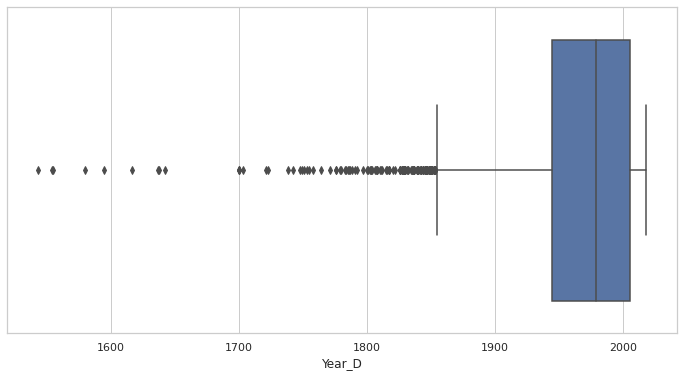

In [66]:
#mostrar outlayers para dejarlos fuera
sns.boxplot(x="Year_D", data = anual);

In [67]:
#para tener unos datos lo más consistentes posibles, podríamos hacer una selección de la cuenta de ataques a partir de 1950

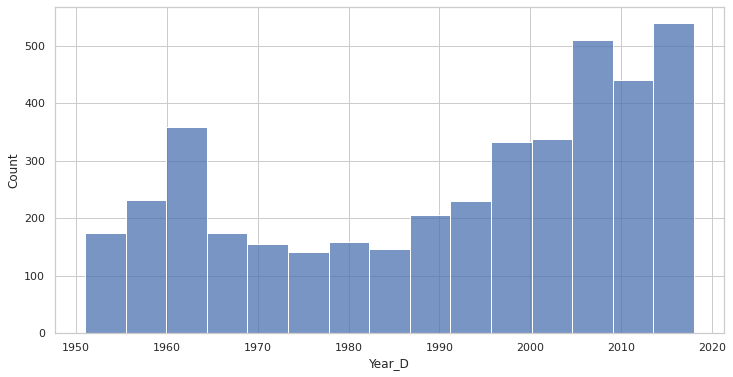

In [68]:
sns.histplot(x=anual[anual.Year_D > 1950].Year_D, palette = "mako");

In [69]:
fig = px.histogram(anual,x=anual[anual.Year_D > 1950].Year_D)
fig.update_layout(bargap=0.01)
fig.add_vline(anual.Year_D.median(), line_width=3, line_dash="dash", line_color="red")
fig.add_vline(anual.Year_D.mean(), line_width=3, line_dash="dash", line_color="green")
fig.show()

#### 